In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import pandas as pd

In [2]:
df = pd.read_csv("../TrainingData/parking_birmingham.csv", parse_dates = [3])

parse_dates=[3] - это опция, которая указывает, что столбец с индексом 3 (четвертый столбец в файле) содержит даты, которые нужно автоматически преобразовать в объекты даты datetime.

При использовании parse_dates, Pandas автоматически распознает даты в указанных столбцах и представляет их как объекты даты, что делает работу с данными и выполнение операций, связанных с датами, более удобной и интуитивной.

In [3]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [4]:
df.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df['Day'] = df.Timestamp.dt.date
df['Month'] = df.Timestamp.dt.month
df['Hour'] = df.Timestamp.dt.hour

In [5]:
park = df[df.Location.isin(['Broad Street', 'NIA South'])]

park.sample(4)

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
24983,NIA South,788,499,2016-11-27 14:02:23,2016-11-27,11,14
20210,Broad Street,690,494,2016-10-06 09:30:20,2016-10-06,10,9
24298,NIA South,788,295,2016-10-18 13:28:57,2016-10-18,10,13
24349,NIA South,788,154,2016-10-23 11:59:50,2016-10-23,10,11


In [6]:
sns.set_style('dark')

In [15]:
months = [pd.to_datetime('2016-10-1'), 
          pd.to_datetime('2016-11-1'), 
          pd.to_datetime('2016-12-1')]
plt.rc('date.autoformatter', day='%b %Y')

rc - это "Resource Configuration"; используется для установки и настройки различных параметров и стилей для графиков и рисунков в библиотеке Matplotlib. Эти параметры могут включать в себя стили линий, шрифтов, цветов, форматирование дат, размеры изображений и многое другое.

Строка plt.rc('date.autoformatter', day='%b %Y') используется для настройки формата автоформатирования даты на графиках, созданных с использованием библиотеки Matplotlib.

В данном случае, формат устанавливается так, что дни будут представлены сокращенным названием месяца (%b) и годом (%Y). Например, "Oct 2016" для октября 2016 года.

([<matplotlib.axis.XTick at 0x1ac7867e150>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

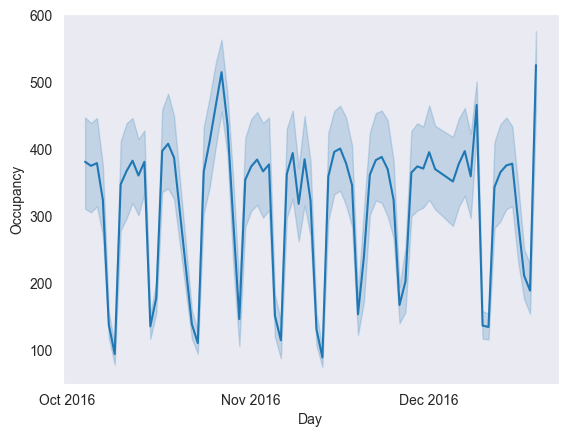

In [16]:
sns.lineplot(x = park.Day, y = park.Occupancy) # will show the mean value for each day
plt.xticks(months) #just the beginning of the month as x-ticks

<Axes: xlabel='Hour', ylabel='Occupancy'>

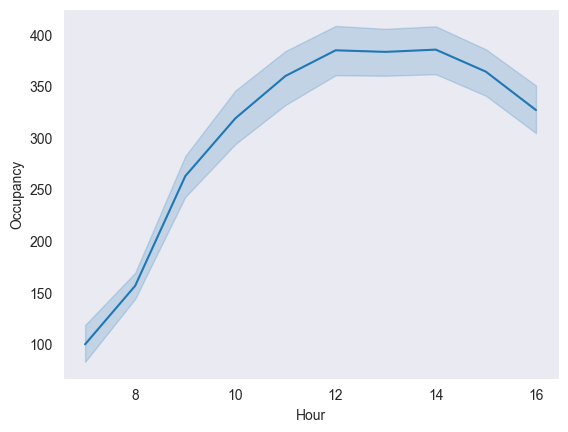

In [18]:
sns.lineplot(x = park.Hour, y = park.Occupancy)

<Axes: xlabel='Hour', ylabel='Occupancy'>

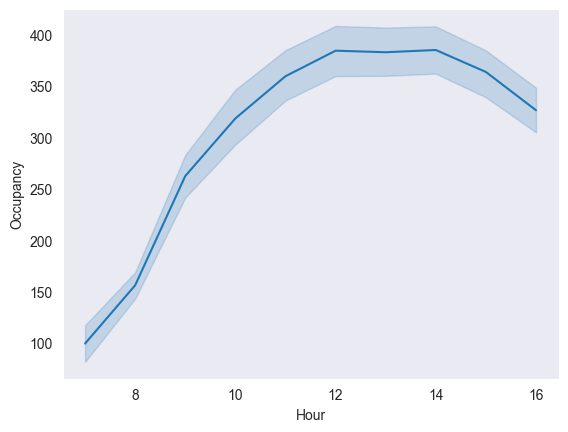

In [19]:
sns.lineplot(x='Hour', y= 'Occupancy', data = park) #exactly same result

## Bootstrapping

Bootstrapping is a technique in which random samples, known as "bootstrap samples," are drawn from the original data with replacement. This process is repeated multiple times to estimate various statistical properties or create confidence intervals for a population.

<Axes: xlabel='Hour', ylabel='Occupancy'>

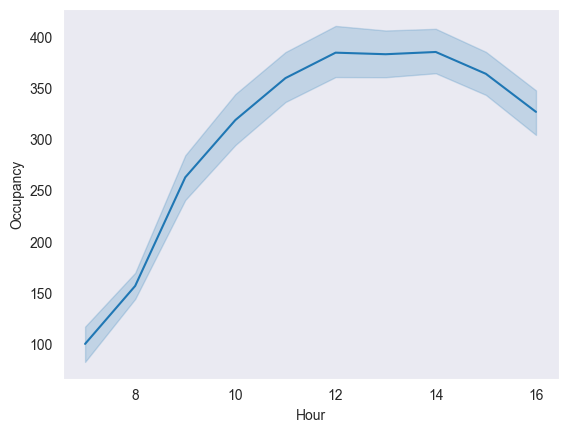

In [20]:
#the default number of bootstraps for building confidence intervals is 1000
sns.lineplot(x = 'Hour', y = 'Occupancy', data = park, n_boot = 1000) 


<Axes: xlabel='Hour', ylabel='Occupancy'>

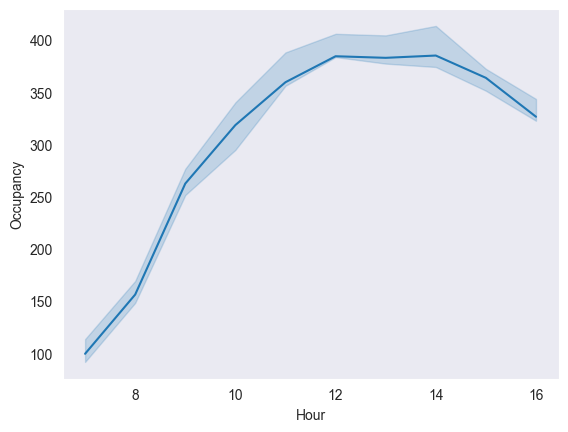

In [22]:
# if running this multiple times, shaded area would likely be different each time
sns.lineplot(x = 'Hour', y = 'Occupancy', data = park, n_boot = 10) 

<Axes: xlabel='Hour', ylabel='Occupancy'>

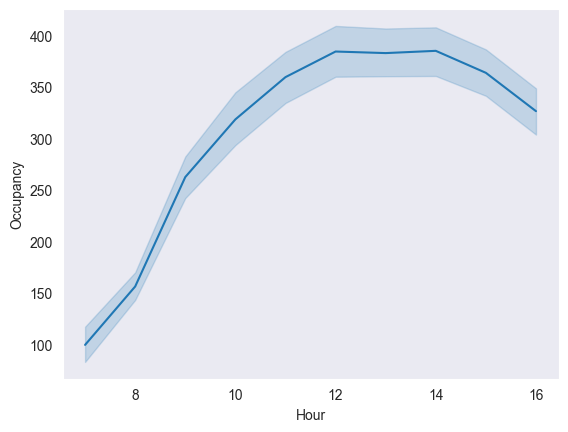

In [25]:
# setting how big confidence inteval should be (default 95)
sns.lineplot(x= 'Hour', y = 'Occupancy', data = park, errorbar = ('ci', 95))

<Axes: xlabel='Hour', ylabel='Occupancy'>

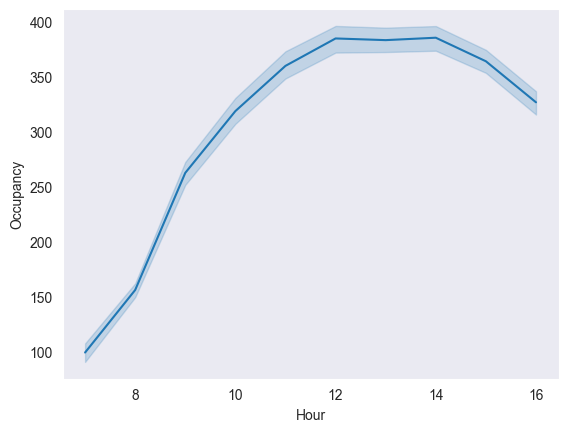

In [26]:
sns.lineplot(x= 'Hour', y = 'Occupancy', data = park, errorbar = ('ci', 65))

<Axes: xlabel='Hour', ylabel='Occupancy'>

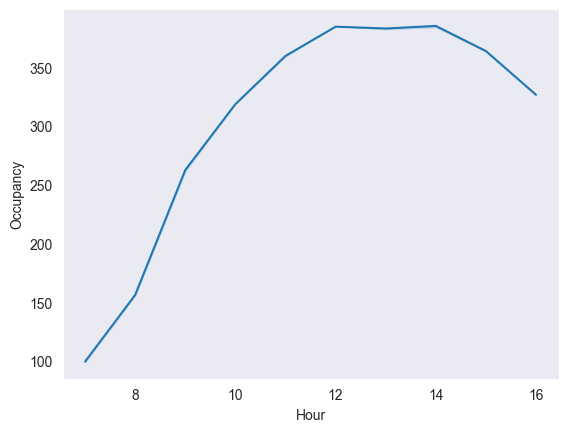

In [28]:
sns.lineplot(x= 'Hour', y = 'Occupancy', data = park, errorbar = ('ci', 0))

# default estimator is 'mean'

<Axes: xlabel='Hour', ylabel='Occupancy'>

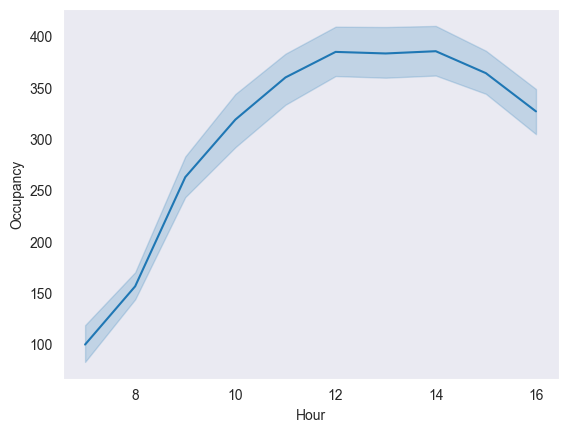

In [29]:
sns.lineplot(x= 'Hour', y = 'Occupancy', data = park, estimator = 'mean')

<Axes: xlabel='Hour', ylabel='Occupancy'>

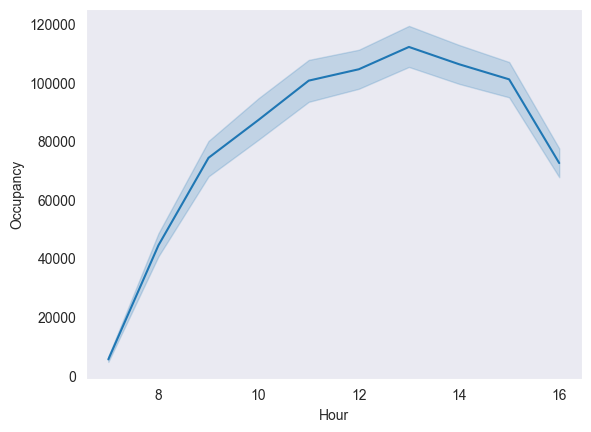

In [30]:
sns.lineplot(x= 'Hour', y = 'Occupancy', data = park, estimator = 'sum')

<Axes: xlabel='Hour', ylabel='Occupancy'>

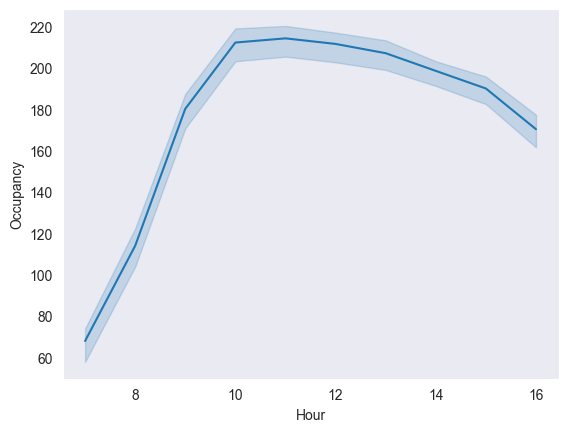

In [31]:
sns.lineplot(x= 'Hour', y = 'Occupancy', data = park, estimator = 'std') #standard deviation

# plotting additional information

### hue

([<matplotlib.axis.XTick at 0x1ac79bd6290>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

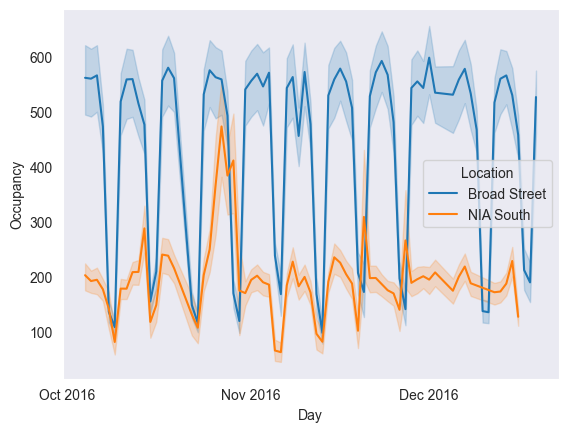

In [33]:
sns.lineplot(x= 'Day', y = 'Occupancy', data = park, hue = 'Location')
plt.xticks(months)

([<matplotlib.axis.XTick at 0x1ac76ff8150>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

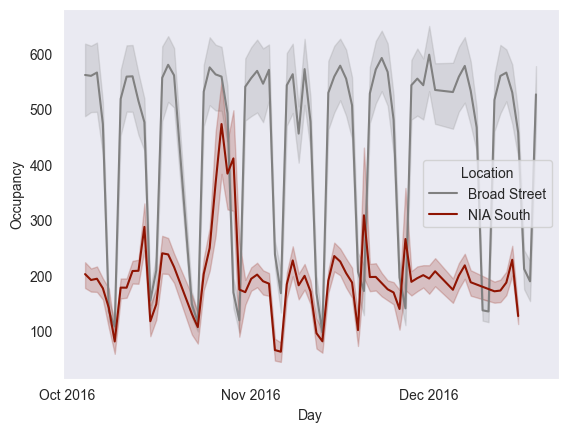

In [35]:
# setting specific colors
sns.lineplot(x= 'Day', y = 'Occupancy', data = park, hue = 'Location', 
             palette = ['gray', 'xkcd:brick red'])
plt.xticks(months)

### style

([<matplotlib.axis.XTick at 0x1ac79c03710>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

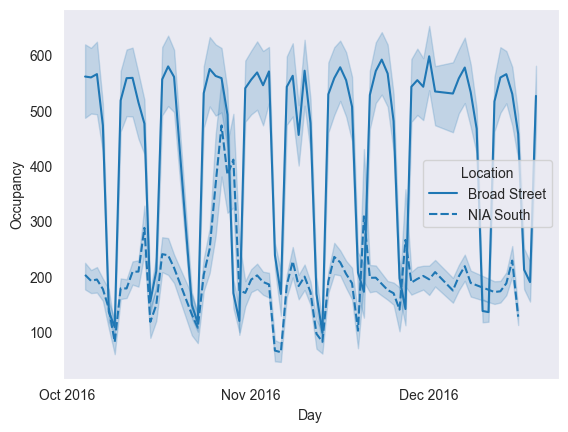

In [36]:
sns.lineplot(x= 'Day', y = 'Occupancy', data = park, style = 'Location')
plt.xticks(months)

([<matplotlib.axis.XTick at 0x1ac79c35850>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

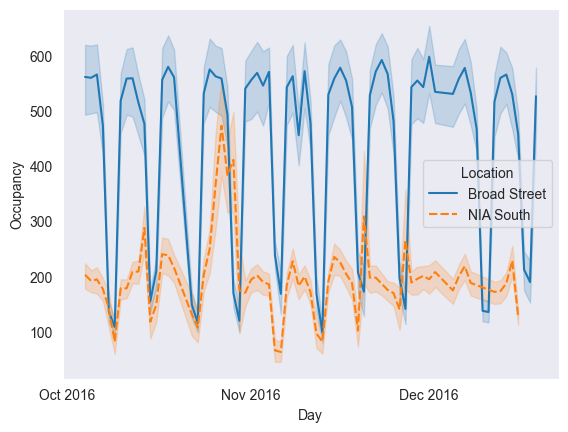

In [37]:
sns.lineplot(x= 'Day', y = 'Occupancy', data = park, hue = 'Location', style = 'Location')
plt.xticks(months)

### size

([<matplotlib.axis.XTick at 0x1ac79d20050>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

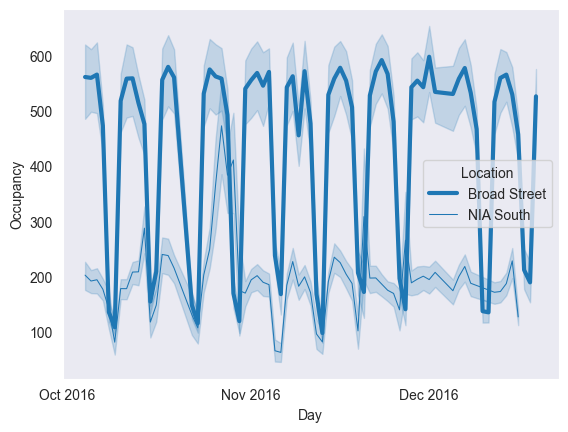

In [38]:
sns.lineplot(x= 'Day', y = 'Occupancy', data = park, size = 'Location')
plt.xticks(months)

<Axes: xlabel='Hour', ylabel='Occupancy'>

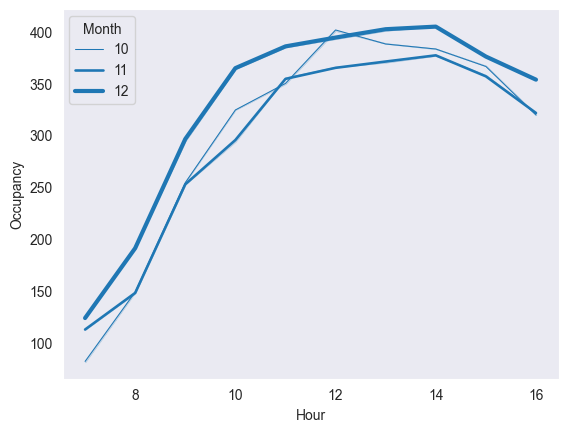

In [41]:
sns.lineplot(x= 'Hour', y = 'Occupancy', data = park, errorbar = ('ci', 0), size = 'Month')


# Style

([<matplotlib.axis.XTick at 0x1ac7af97490>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

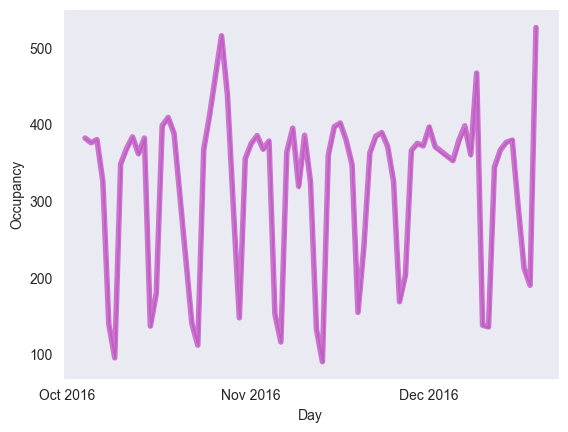

In [44]:
sns.lineplot(x= 'Day', y = 'Occupancy', data = park, errorbar = ('ci', 0), lw = 4, color = '#aa00aa', alpha = 0.5)
plt.xticks(months)